<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/Correlation%26MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Scenario:**
Let’s assume we have data on the height, weight, and age of a group of people, and we want to:



1.   Investigate if there is any correlation between these variables.
2.  Use multiple regression to predict a person’s weight based on their height and age.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a simple dataset
data = {
    'Height': [170, 165, 180, 175, 160, 155, 182, 178, 169, 172],  # in cm
    'Weight': [70, 65, 80, 75, 60, 55, 85, 78, 68, 72],  # in kg
    'Age': [25, 30, 35, 40, 22, 28, 33, 38, 26, 31]  # in years
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)


   Height  Weight  Age
0     170      70   25
1     165      65   30
2     180      80   35
3     175      75   40
4     160      60   22
5     155      55   28
6     182      85   33
7     178      78   38
8     169      68   26
9     172      72   31


### **Correlation Analysis**

#### **Pearson Correlation Coefficient**
The Pearson correlation coefficient measures the linear relationship between two variables. It ranges from -1 to 1, where:

- 1 means perfect positive correlation,
- -1 means perfect negative correlation,
- 0 means no correlation.

Let's calculate the correlation between height, weight, and age.

          Height    Weight       Age
Height  1.000000  0.994941  0.684966
Weight  0.994941  1.000000  0.671348
Age     0.684966  0.671348  1.000000


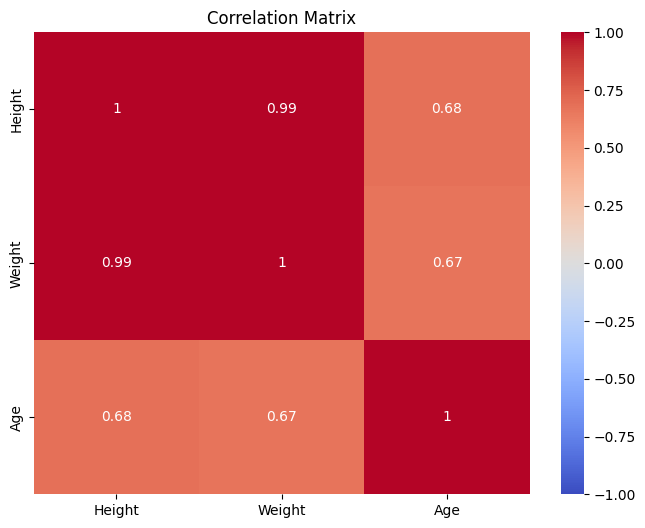

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

#### **Interpretation:**
- Height and Weight: Correlation = 0.99 (strong positive correlation).
- Age and Weight: Correlation = 0.67 (positive correlation).
- Age and Height: Correlation = 0.68 (positive correlation).

From this, we see that height and weight are highly correlated, meaning that as a person’s height increases, their weight tends to increase.

Now lets do multiple regression with this data...


In [ ]:
# Independent variables (Height and Age)
X = df[['Height', 'Age']]

# Dependent variable (Weight)
y = df['Weight']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


Intercept: -110.14909975029569
Coefficients: [ 1.06616434 -0.03047196]


So the regression equation will be

$$
\hat{y} = -110 + 1.07 \cdot \text{Height} - 0.03  \cdot \text{Age}
$$

Let’s predict the weight of a person who is 175 cm tall and 30 years old:

In [ ]:
# Predict for a new person with height = 175 cm and age = 30 years
new_person = [[175, 30]]
predicted_weight = model.predict(new_person)
print(f"Predicted Weight: {predicted_weight[0]:.2f} kg")


Predicted Weight: 75.52 kg


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can evaluate how well the regression model fits the data using the R-squared value:

In [ ]:
# Predict values for the training set
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared:.2f}")


R-squared: 0.99


### **Visualization**

A residual plot helps us visualize the difference between actual and predicted values.



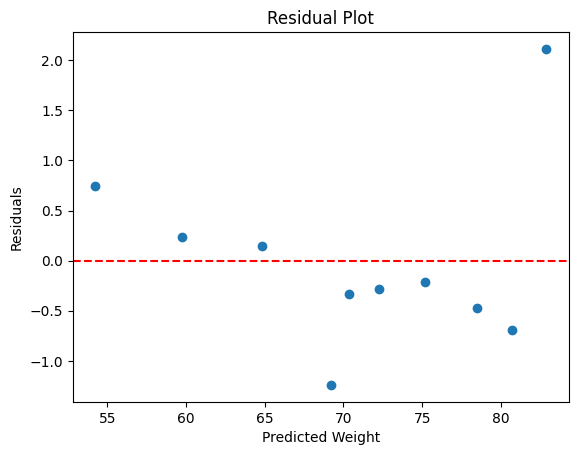

In [ ]:
# Plot residuals
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Weight')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### **3D Scatter Plot with Regression Plane:**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


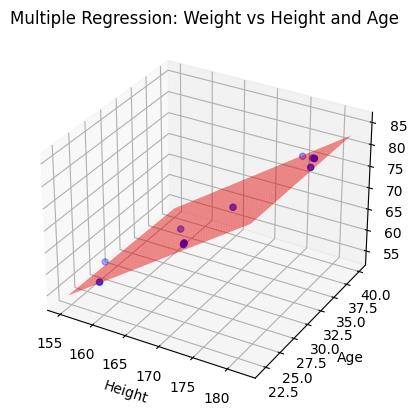

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(df['Height'], df['Age'], df['Weight'], color='blue', label='Data Points')

# Generate prediction plane
x_surf, y_surf = np.meshgrid(np.linspace(df['Height'].min(), df['Height'].max(), 100),
                             np.linspace(df['Age'].min(), df['Age'].max(), 100))
z_surf = model.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

# Labels
ax.set_xlabel('Height')
ax.set_ylabel('Age')
ax.set_zlabel('Weight')
ax.set_title('Multiple Regression: Weight vs Height and Age')

plt.show()


In [ ]:
# with plotly
!pip install plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import plotly.figure_factory as ff

# Prepare the data for fitting
# Independent variables (Height and Age)
X = df[["Height", "Age"]]

# Dependent variable (Weight)
y = df["Weight"]

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f"Intercept (b): {model.intercept_}")
print(f"Coefficients (a1, a2): {model.coef_}")

# Generate predictions for the fitted plane
y_pred = model.predict(X)

x1=df["Height"]
x2=df["Age"]


# Create a grid for the regression plane
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 50),
                               np.linspace(x2.min(), x2.max(), 50))
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# Scatter plot of the original data points
scatter = go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Data Points'
)


# Prepare the data for fitting
X = np.column_stack((x1, x2))

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f"Intercept (b): {model.intercept_}")
print(f"Coefficients (a1, a2): {model.coef_}")

# Generate predictions for the fitted plane
y_pred = model.predict(X)

# Create a grid for the regression plane
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 50),
                               np.linspace(x2.min(), x2.max(), 50))
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# Scatter plot of the original data points
scatter = go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Data Points'
)

# Regression plane
plane = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_grid,
    colorscale='Viridis',
    opacity=0.5,
    name='Regression Plane'
)

# Layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Y'
    ),
    title='Interactive Multiple Linear Regression',
)

# Create the figure
fig = go.Figure(data=[scatter, plane], layout=layout)

# Show the plot
fig.show()

Intercept (b): -110.14909975029569
Coefficients (a1, a2): [ 1.06616434 -0.03047196]
Intercept (b): -110.14909975029569
Coefficients (a1, a2): [ 1.06616434 -0.03047196]


In [9]:
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

# Prepare the data for fitting
X = df[["Height", "Age"]]
y = df["Weight"]

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f"Intercept (b): {model.intercept_}")
print(f"Coefficients (a1, a2): {model.coef_}")

# Generate predictions for the fitted plane
y_pred = model.predict(X)

# Residuals (errors between actual and predicted)
residuals = y - y_pred

x1 = df["Height"]
x2 = df["Age"]

# Create a grid for the regression plane
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 50),
                               np.linspace(x2.min(), x2.max(), 50))
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# Scatter plot of the original data points
scatter = go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Data Points'
)

# Regression plane
plane = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_grid,
    colorscale='Viridis',
    opacity=0.5,
    name='Regression Plane'
)

# Manually add error bars as lines (from y to y_pred)
error_lines = []
for i in range(len(x1)):
    error_lines.append(go.Scatter3d(
        x=[x1.iloc[i], x1.iloc[i]],  # Keep x (Height) the same
        y=[x2.iloc[i], x2.iloc[i]],  # Keep y (Age) the same
        z=[y.iloc[i], y_pred[i]],    # z goes from actual y to predicted y_pred
        mode='lines',
        line=dict(color='red', width=2),
        name='Error Bar' if i == 0 else None,  # Only label the first line as "Error Bar"
        showlegend=(i == 0)  # Show legend only for the first error line
    ))

# Layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis_title='Height',
        yaxis_title='Age',
        zaxis_title='Weight'
    ),
    title='Interactive Multiple Linear Regression with Manual Error Bars',
)

# Create the figure with both data points, regression plane, and error lines
fig = go.Figure(data=[scatter, plane] + error_lines, layout=layout)

# Show the plot
fig.show()


0   -0.337039
1    0.146143
2   -0.693963
3   -0.210781
4    0.233189
5    0.746842
6    2.112765
7   -0.470218
8   -1.240402
9   -0.286536
Name: Weight, dtype: float64
{'type': 'data', 'array': 0   -0.337039
1    0.146143
2   -0.693963
3   -0.210781
4    0.233189
5    0.746842
6    2.112765
7   -0.470218
8   -1.240402
9   -0.286536
Name: Weight, dtype: float64, 'visible': True}
Intercept (b): -110.14909975029569
Coefficients (a1, a2): [ 1.06616434 -0.03047196]
